In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [ ]:
!pip install pyltr
!pip install caserecommender
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '/content/gdrive/My Drive/Data Mining (master)/DM Assignment 2 (group 43)/External parties packages/')

from Feature_engineering  import*
from IPython.display import clear_output
clear_output()

Check this repository: https://github.com/caserec/CaseRecommender if we decide to incorporate that.


Dependencies

In [ ]:
# Initial dependencies
import pickle
import pandas as pd 
import numpy as np
import random
from collections import Counter
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import re
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import pearsonr
import time

# Pre-processing models: MICE
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

#Randking models
import pyltr.models
from pyltr import models 
from pyltr.util.group import get_groups
from pyltr.metrics import NDCG
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import ExtraTreesRegressor

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
clear_output()

Functions: 

Load Data and descriptives

In [ ]:
train = pd.read_csv(r'/content/gdrive/My Drive/Data Mining (master)/DM Assignment 2 (group 43)/unzipped/training_set_VU_DM.csv')

Before continuing, run the functions at the end of the notebook.

In [ ]:
# # EDA
# print(train.describe())
print('\n'.join('{}: {}'.format(*k) for k in enumerate(train.columns)))
# print(train.shape)

In [ ]:
# Get first pre-processing (version 0).
# train_engi = featureEngineering(train, True)
# train_engi.to_csv("/content/gdrive/My Drive/Data Mining (master)/DM Assignment 2 (group 43)/train_processed_0.csv", index=False)

train_engi = pd.read_csv(r'/content/gdrive/My Drive/Data Mining (master)/DM Assignment 2 (group 43)/train_processed_0.csv')
train_engi.columns

Index(['srch_id', 'visitor_hist_adr_usd', 'prop_id', 'prop_starrating', 'prop_review_score', 'prop_location_score1', 'prop_location_score2', 'prop_log_historical_price', 'promotion_flag', 'srch_length_of_stay', 'srch_booking_window', 'srch_adults_count', 'srch_children_count', 'srch_query_affinity_score', 'orig_destination_distance', 'comp', 'order_on_price', 'single_person', 'difference_price', 'ranking_on_location', 'diff_trend', 'urgency', 'price_fluctuations', 'QualityRatio1', 'QualityRatio2', 'ReviewRatingRatio3', 'target_score'], dtype='object')

In [ ]:
train_engi.describe()

In [ ]:
 train_nas = assess_NA(train) 
 print(train_nas)
# freq_ = pd.DataFrame.from_dict(Counter(train_engi['target_score']), orient='index').reset_index().rename(columns ={'index':'target_score', 0:'Frequency'})
# fig = px.bar(freq_.dropna(), x='target_score', y='Frequency')
# fig.show()

                           Number of NA  Percent NA
comp1_rate_percent_diff         4863908       98.10
comp6_rate_percent_diff         4862173       98.06
comp1_rate                      4838417       97.58
comp1_inv                       4828788       97.39
comp4_rate_percent_diff         4827261       97.36
gross_bookings_usd              4819957       97.21
comp7_rate_percent_diff         4819832       97.21
comp6_rate                      4718190       95.16
visitor_hist_starrating         4706481       94.92
visitor_hist_adr_usd            4705359       94.90
comp6_inv                       4697371       94.74
comp4_rate                      4650969       93.80
comp7_rate                      4642999       93.64
srch_query_affinity_score       4640941       93.60
comp4_inv                       4614684       93.07
comp7_inv                       4601925       92.81
comp3_rate_percent_diff         4485550       90.46
comp2_rate_percent_diff         4402109       88.78
comp8_rate_p

In [ ]:
train.describe()

,srch_id,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,orig_destination_distance,random_bool,comp1_rate,comp1_inv,comp1_rate_percent_diff,comp2_rate,comp2_inv,comp2_rate_percent_diff,comp3_rate,comp3_inv,comp3_rate_percent_diff,comp4_rate,comp4_inv,comp4_rate_percent_diff,comp5_rate,comp5_inv,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
count,4.958347e+06,4.958347e+06,4.958347e+06,251866.000000,252988.000000,4.958347e+06,4.958347e+06,4.958347e+06,4.950983e+06,4.958347e+06,4.958347e+06,3.867999e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,317406.000000,3.350565e+06,4.958347e+06,119930.000000,129559.000000,94439.000000,2.024672e+06,2.130269e+06,556238.000000,1.534288e+06,1.650990e+06,472797.000000,307378.000000,343663.000000,1.310860e+05,2.222373e+06,2.360020e+06,841099.000000,240157.000000,260976.000000,96174.000000,315348.000000,356422.000000,138515.000000,1.916654e+06,1.987503e+06,614730.000000,4.958347e+06,138390.000000,4.958347e+06
mean,1.663666e+05,9.953133e+00,1.753405e+02,3.374334,176.022659,1.739739e+02,7.007918e+04,3.180525e+00,3.777777e+00,6.346994e-01,2.872589e+00,1.303852e-01,4.317913e+00,1.685624e+01,2.542096e+02,2.156198e-01,1.404263e+04,2.385427e+00,3.747417e+01,1.972637e+00,3.504918e-01,1.110525e+00,5.022127e-01,-24.146418,1.301234e+03,2.959004e-01,0.479788,0.031059,244.229916,4.418987e-02,3.931006e-02,18.490732,1.729010e-02,5.776897e-02,27.071559,-0.016543,0.096653,1.753165e+02,2.267621e-02,5.142880e-02,29.851903,0.128329,0.075957,17.250473,0.145969,0.083202,19.433267,-6.089936e-02,9.962752e-03,22.430384,4.474858e-02,386.283316,2.791051e-02
std,9.611223e+04,7.646890e+00,6.591625e+01,0.692519,107.254493,6.834525e+01,4.060992e+04,1.051024e+00,1.050329e+00,4.815144e-01,1.531011e+00,1.594634e-01,1.834869e+00,1.042566e+01,1.600124e+04,4.112517e-01,8.111843e+03,2.053243e+00,5.199341e+01,8.570628e-01,7.325692e-01,4.172290e-01,4.999952e-01,15.743238,2.023951e+03,4.564465e-01,0.641565,0.229688,1165.448634,4.484236e-01,2.342388e-01,240.113851,4.575808e-01,2.948202e-01,1012.919911,0.578718,0.337165,5.757740e+03,5.217575e-01,2.678363e-01,1340.262382,0.559841,0.302668,31.160313,0.578202,0.316722,54.370221,4.691723e-01,2.029142e-01,895.965854,2.067514e-01,821.190577,1.647165e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.410000,0.000000,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,-326.567500,1.000000e-02,0.000000e+00,-1.000000,-1.000000,2.000000,-1.000000e+00,-1.000000e+00,2.000000,-1.000000e+00,-1.000000e+00,2.000000,-1.000000,-1.000000,2.000000e+00,-1.000000e+00,-1.000000e+00,2.000000,-1.000000,-1.000000,2.000000,-1.000000,-1.000000,2.000000,-1.000000e+00,-1.000000e+00,2.000000,0.000000e+00,0.000000,0.000000e+00
25%,8.293600e+04,5.000000e+00,1.000000e+02,2.920000,109.810000,1.000000e+02,3.501000e+04,3.000000e+00,3.500000e+00,0.000000e+00,1.790000e+00,1.900000e-02,4.450000e+00,8.000000e+00,8.500000e+01,0.000000e+00,7.101000e+03,1.000000e+00,4.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,-30.774775,1.398000e+02,0.000000e+00,0.000000,0.000000,7.000000,0.000000e+00,0.000000e+00,7.000000,0.000000e+00,0.000000e+00,7.000000,0.000000,0.000000,7.000000e+00,0.000000e+00,0.000000e+00,7.000000,0.000000,0.0

In [ ]:
print(len(train_engi['prop_id'].unique()))
print(train.info())

In [ ]:
corr(train)

Outlier detection

In [ ]:
columns_transformed = ['visitor_hist_starrating','visitor_hist_adr_usd',
                      'orig_destination_distance','prop_starrating',
                      'price_usd',
                       'gross_bookings_usd',
                      'prop_location_score2','prop_location_score1',
                       'prop_review_score','prop_brand_bool']

# detecting outliers:
"""
start_time = time.time()
outliers_list = detect_outliers_z(train.loc[:, columns_transformed])  # everything up till price
len(outliers_list)
l = [4,3,2]
for i in l:
    common_outliers(i,train.loc[:, columns_transformed])
print("--- %s minutes ---" % ((time.time() - start_time)/60))
"""
outliers_list = load_obj("full outliers_columns_transformed_z-score")
outliers = load_obj("Common_outliers_2-features")

In [ ]:
#train.loc[:, columns_transformed].info()

percentage of common outliers : 0.010128375444477767 for atleast 2 features, nominal length equals 50220
--- 600.3506899595261 minutes ---


In [ ]:
len(set(outliers_list))/len(train)

0.11017441901504675

In [ ]:
#train.loc[:, columns_transformed].describe()

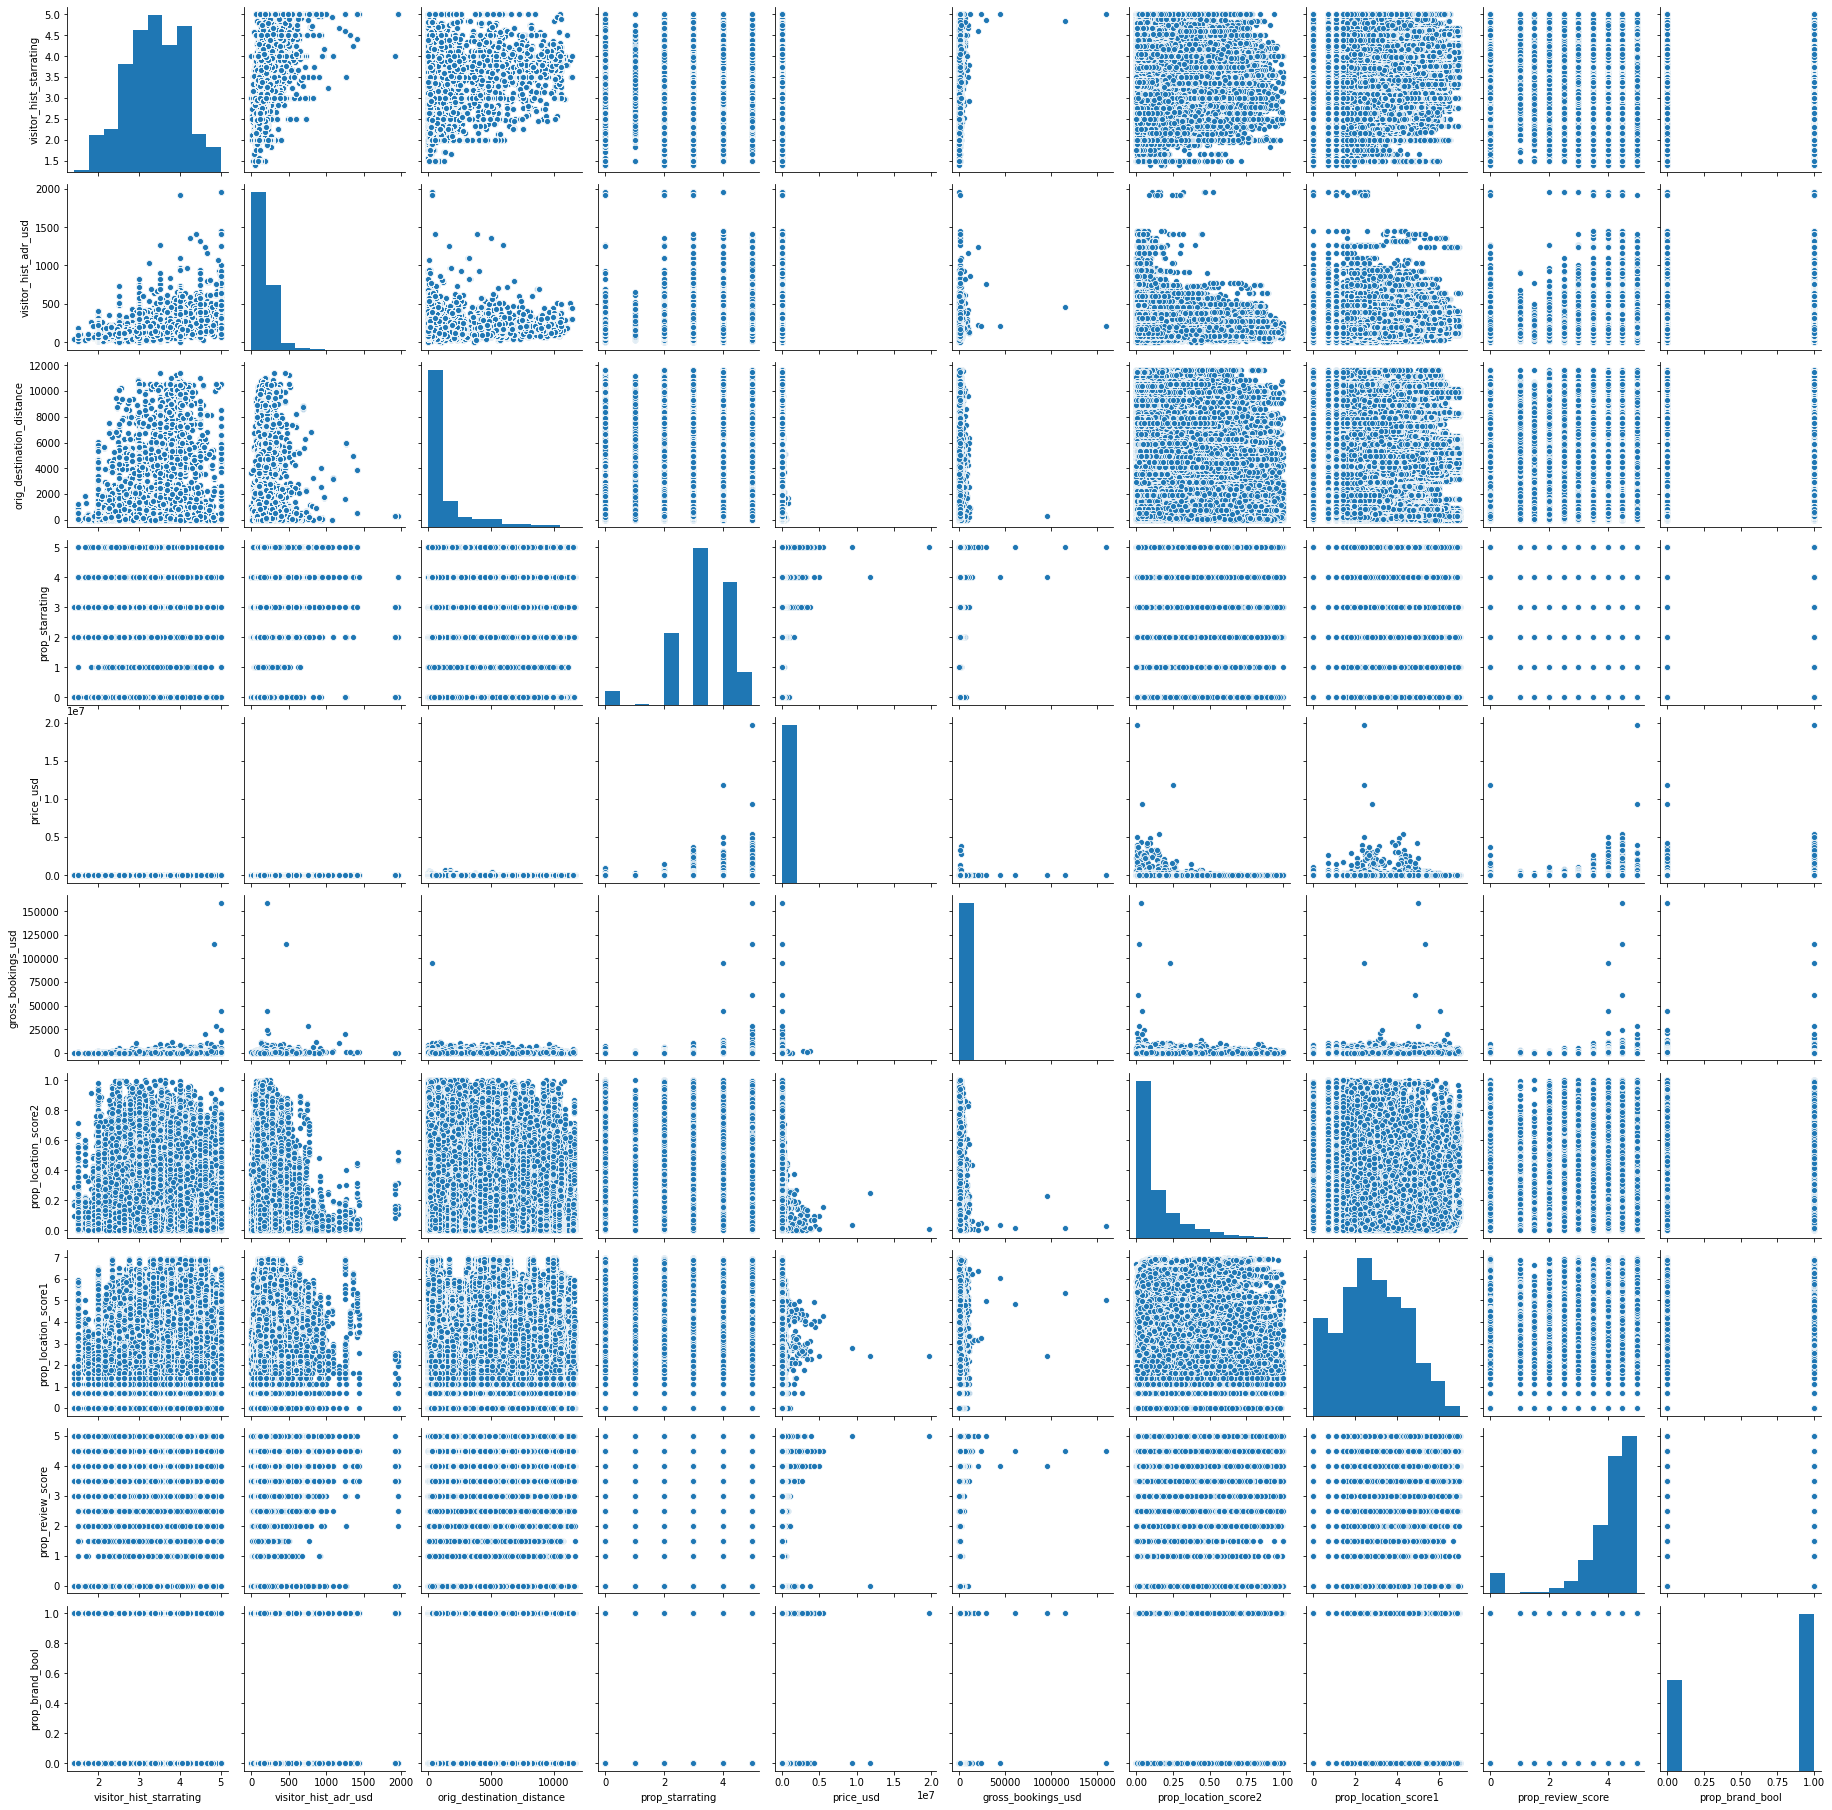

In [ ]:
sns.pairplot(train.loc[:, columns_transformed])

In [ ]:
# np.array(outliers_list).shape
# print(len([item for item, count in Counter(outliers_list).items() if count > 1]))

train_free = train[train.index.isin(set(outliers_list)) == False] # if outliers : train_free is free of outliers common in 2 or more features (-50220 entries)
train_free.reset_index(inplace = True, drop = True)  # 
del(train)
# assess_NA(train_free)

In [ ]:
sum(list(train_free.loc[:, columns_transformed ].isnull().sum()))/ (len(train_free.loc[:, columns_transformed ])*len(columns_transformed))
#len(train_free.loc[:, columns_transformed ]) - 

0.33933641941730674

In [ ]:
# EXTRACT biggest unestimated subset 
l = []
for feature in ['visitor_hist_starrating','visitor_hist_adr_usd',
                      #'orig_destination_distance',                             # taking this one into account brings us above 3 million records
                       'gross_bookings_usd']:
  if train_free[feature].isnull().values.any():
    l.append(list(train_free[train_free[feature].notnull()].index))
  else:
    pass
l = [item for sublist in l for item in sublist]
l = set(l)
sample = train_free.loc[:, columns_transformed ][train_free.loc[:, columns_transformed ].index.isin(l) == True]

# Fill in until 1 million records
'''
n = 8*10**5 - len(sample)   
sample = sample.append(train_free.loc[:, columns_transformed ][train_free.loc[:, columns_transformed ].index.isin(l) == False].sample(n,random_state = 0))
'''
# sample.to_csv("/content/gdrive/My Drive/Data Mining (master)/DM Assignment 2 (group 43)/unestimated_sample_1-million_chosen-columns.csv", index=True)


Fill mising values per batch
, merge later with imports.

In [ ]:
#set seed
random.seed(0)

n = 8*10**5 - len(sample)    # you can increase the 8*10**5 (to 2 million ) for better estimates if it fits in memory during the loop
nr_splits = np.round((len(train_free) - len(sample))/n)
list_indexes = list(train_free.loc[:, columns_transformed ][train_free.loc[:, columns_transformed ].index.isin(l) == False].index)
full_length_li = len(list_indexes)
while len(list_indexes) >= n:
  s = random.sample(list_indexes,n)
  transformed = sample.append(train_free.loc[:, columns_transformed ][train_free.loc[:, columns_transformed ].index.isin(s) == True])
  transformed = MICE(transformed.loc[:, columns_transformed],6,2,1)   # increasing the 2 to 3 or 4 gives better estimates but at the cost of RAM. See whats possible
  if len(list_indexes) == full_length_li: # just for the first case include the initial sample to save to_csv
    transformed.to_csv("/content/gdrive/My Drive/Data Mining (master)/DM Assignment 2 (group 43)/estimated_subsample_Initial.csv", index=True)
  else:
    transformed = transformed.loc[:,columns_transformed ][transformed.loc[:, columns_transformed ].index.isin(list(sample.index)) == False]
    transformed.to_csv("/content/gdrive/My Drive/Data Mining (master)/DM Assignment 2 (group 43)/estimated_subsample_" + str(transformed.index[-1:][0]) +".csv", index=True)
  list_indexes = [item for item in list_indexes if item not in s]

[IterativeImputer] Completing matrix with shape (800000, 10)
[IterativeImputer] Change: 5649.749441336551, scaled tolerance: 47.428000000000004 


In [ ]:
sample.index[-1:][0]

4412062

FILL in missing values:

In [ ]:
transformed = MICE(sample.loc[:, columns_transformed ],6,2,1) # 4
transformed.to_csv("/content/gdrive/My Drive/Data Mining (master)/DM Assignment 2 (group 43)/estimated_sample_1-million_chosen-columns.csv", index=True)

[IterativeImputer] Completing matrix with shape (800000, 10)
[IterativeImputer] Change: 5518.200905974326, scaled tolerance: 47.428000000000004 


In [ ]:
transformed.head(10)

,visitor_hist_starrating,visitor_hist_adr_usd,orig_destination_distance,prop_starrating,price_usd,gross_bookings_usd,prop_location_score2,prop_location_score1,prop_review_score,prop_brand_bool
10,3.340324,168.583700,459.273412,2.0,100.89,114.29,0.020600,2.20,3.0,1.0
56,3.135575,150.581240,652.840000,3.0,145.00,162.38,0.122442,1.95,4.0,1.0
61,2.987457,109.848038,4.170000,3.0,85.00,96.41,0.210700,3.00,3.5,1.0
125,3.839960,189.356298,1936.116962,3.0,47.94,222.58,0.537000,4.04,3.5,0.0
139,3.251393,127.190356,767.860000,4.0,42.00,47.10,0.367600,3.26,4.0,0.0
171,3.748962,196.950241,116.140000,4.0,85.00,286.32,0.049100,2.89,4.0,1.0
202,3.348463,139.070157,3748.900000,3.0,248.17,1927.64,0.113600,5.72,4.0,0.0
239,3.512061,182.653586,3319.694783,3.0,176.98,1831.30,0.265300,4.55,3.5,1.0
268,3.487536,183.611487,424.073202,3.0,101.51,226.76,0.178400,1.61,4.0,1.0
307,2.691265,110.877991,53.920000,2.0,55.00,60.77,0.321700,1.10,3.5,1.0


Functions
- we can export these in a seperate .py

In [ ]:
def save_obj(obj, name):
    with open('/content/gdrive/My Drive/Data Mining (master)/DM Assignment 2 (group 43)/'+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name):
    with open('/content/gdrive/My Drive/Data Mining (master)/DM Assignment 2 (group 43)/'+ name + '.pkl', 'rb') as f:
        return pickle.load(f)

#IQR (performs better)
def detect_outliers(data, Q_only = False):
    outliers_list = []
    for feature in data.keys():  
        f = data[feature].dropna()     
        # Calculate Q1 (25th percentile of the data) for the given feature
        Q1 = np.percentile(f, 25)
        # Calculate Q3 (75th percentile of the data) for the given feature
        Q3 = np.percentile(f, 75)
        # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
        if Q_only == True:
            step = 0
        else:
        
            step = (Q3 - Q1) * 1.5
        
        outliers = list(f[~((f >=  Q1 - step) & (f <= Q3 + step))].index.values)
        outliers_list.extend(outliers)
    save_obj(outliers_list,"full outliers_columns_transformed")
    return outliers_list

# Z-score
def detect_outliers_z(data):
    outliers_list = []
    for feature in data.keys():  
        f = data[feature].dropna()     
        threshold = 3
        mean_y = np.mean(f.values)
        stdev_y = np.std(f.values)
        z_scores = [(y - mean_y) / stdev_y for y in f.values]
        outliers = list(f[~(np.abs(z_scores)<=threshold)].index.values)
        outliers_list.extend(outliers)
    save_obj(outliers_list,"full outliers_columns_transformed_z-score")
    return outliers_list
def common_outliers(i,df):   
    '''
    Define i as number of atleast common columns and df equals the dataset
    '''
    outliers  = list(set([x for x in outliers_list if outliers_list.count(x) >= i]))  
    length = len(outliers)/len(df)  
    save_obj(outliers,"Common_outliers_{}-features".format(i))
    print('percentage of common outliers : {} for atleast {} features, nominal length equals {}'.format(length,i,len(outliers)))
    return outliers
def corr(data) :
    corr = data.corr()
    return corr.style.background_gradient().set_precision(2)
    
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]
# check NA in a dataframe
def assess_NA(data):
    
    """
    Returns a pandas dataframe denoting the total number of NA values and the percentage of NA values in each column.
    The column names are noted on the index.
    
    Parameters
    ----------
    data: dataframe
    """
    # pandas series denoting features and the sum of their null values
    null_sum = data.isnull().sum()# instantiate columns for missing data
    total = null_sum.sort_values(ascending=False)
    percent = ( ((null_sum / len(data.index))*100).round(2) ).sort_values(ascending=False)
    
    # concatenate along the columns to create the complete dataframe
    df_NA = pd.concat([total, percent], axis=1, keys=['Number of NA', 'Percent NA'])
    
    # drop rows that don't have any missing data; omit if you want to keep all rows
    df_NA = df_NA[ (df_NA.T != 0).any() ]
    
    return df_NA
  ################################
def MICE(df,nr_features = 5, max_it = 10,verbose = 1): 
  "Fills in NAN values based on Multiple Imputation with Chained Equations"

  imp = IterativeImputer(estimator = ExtraTreesRegressor(min_samples_leaf=4,n_estimators=50,random_state = 0),verbose = verbose,
                         random_state=0,n_nearest_features = nr_features,sample_posterior = False,max_iter= max_it).fit(df.values)
  transformed = imp.transform(df.values)

  transformed = pd.DataFrame(transformed, columns=df.columns, index = df.index)
  return transformed

# Log transform:  df[""] = df[""].map(lambda i: np.log(i) if i > 0 else 0)

In [ ]:
# l = {"1": [1,2,2,2,2,3,4,1,1,1,1,1,2,4,1,100000,22221,12,-4]}
# data = pd.DataFrame(l)
# outliers = detect_outliers(data)
# outliers


In [ ]:
data

,1
0,1
1,2
2,2
3,2
4,2
5,3
6,4
7,1
8,1
9,1


In [ ]:
print("Top Absolute Correlations: \n")
print(get_top_abs_correlations(train_engi, 9))

Top Absolute Correlations: 

prop_log_historical_price  difference_price      0.943050
urgency                    price_fluctuations    0.925797
QualityRatio1              ReviewRatingRatio3    0.725290
                           QualityRatio2         0.698570
prop_starrating            ReviewRatingRatio3    0.642540
prop_log_historical_price  diff_trend            0.575205
srch_adults_count          single_person         0.538169
prop_starrating            QualityRatio1         0.536140
difference_price           diff_trend            0.532651
dtype: float64
